# Comparing with assessed ranges

Here we show how the data can be processed and compared with the assessed ranges.

In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
%load_ext autoreload
%autoreload 2

<IPython.core.display.Javascript object>

In [3]:
import os.path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pyrcmip.assessed_ranges
import pyrcmip.database
import pyrcmip.metric_calculations
import scmdata

/data/ubuntu-znicholls/miniconda3/envs/rcmip-phase-2/lib/python3.7/site-packages/pyrcmip/assessed_ranges.py:12: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  import tqdm.autonotebook as tqdman


<IPython.core.display.Javascript object>

In [4]:
import utils.plotting
import utils.rcmip

<IPython.core.display.Javascript object>

In [5]:
PAPER_DIR = os.path.join("..", "..", "paper")

<IPython.core.display.Javascript object>

In [6]:
ASSESSED_RANGES_CSV = os.path.join(
    "..", "..", "data", "processed", "assessed-ranges", "assessed-ranges-v2-2-0.csv"
)
ASSESSED_RANGES_CSV

'../../data/processed/assessed-ranges/assessed-ranges-v2-2-0.csv'

<IPython.core.display.Javascript object>

In [7]:
assessed_ranges = pd.read_csv(ASSESSED_RANGES_CSV)
assessed_ranges.head()

RCMIP name  \
0  Surface Air Ocean Blended Temperature Change W...   
1                    Equilibrium Climate Sensitivity   
2                         Transient Climate Response   
3            Transient Climate Response to Emissions   
4  Effective Radiative Forcing|Anthropogenic|CH4 ...   

                                      RCMIP variable RCMIP region  \
0       Surface Air Ocean Blended Temperature Change        World   
1                                                NaN          NaN   
2                     Surface Air Temperature Change        World   
3  Surface Air Temperature Change,Cumulative Emis...        World   
4      Effective Radiative Forcing|Anthropogenic|CH4        World   

  RCMIP scenario  evaluation_period_start  evaluation_period_end  \
0         ssp245                   2000.0                 2019.0   
1            NaN                      NaN                    NaN   
2        1pctCO2                      NaN                    NaN   
3        1pctCO2                      NaN                    NaN   
4     historical                   2011.0                 2011.0   

   norm_period_start  norm_period_end  very_likely__lower  likely__lower  \
0             1961.0           1990.0            0.462509            NaN   
1                NaN              NaN            2.300000         2.6000   
2                NaN              NaN            0.980000         1.2600   
3                NaN              NaN            1.030000         1.4000   
4             1750.0           1750.0                 NaN         0.4725   

   central  likely__upper  very_likely__upper     unit  \
0   0.5372            NaN            0.613695        K   
1   3.1000         3.9000            4.700000        K   
2   1.6400         2.0200            2.290000        K   
3   1.7700         2.1400            2.510000  K / TtC   
4   0.6000         0.7275                 NaN  W / m^2   

  RCMIP evaluation method                                             Source  
0                    mean                                    HadCRUT.4.6.0.0  
1          model-reported                              Sherwood et al., 2020  
2                  custom    Tokarska et al., 2020 Table S3 Both constrained  
3                  custom                                 Arora et al., 2020  
4                    mean  AR5 WG1 Table 8.SM.6, with extra 25% based on ...

<IPython.core.display.Javascript object>

In [8]:
# overwrite 1750 norm period with None
assessed_ranges.loc[
    assessed_ranges["norm_period_start"] == 1750, "norm_period_start"
] = None
assessed_ranges.loc[
    assessed_ranges["norm_period_end"] == 1750, "norm_period_end"
] = None
assessed_ranges

RCMIP name  \
0   Surface Air Ocean Blended Temperature Change W...   
1                     Equilibrium Climate Sensitivity   
2                          Transient Climate Response   
3             Transient Climate Response to Emissions   
4   Effective Radiative Forcing|Anthropogenic|CH4 ...   
5   Effective Radiative Forcing|Anthropogenic|N2O ...   
6   Effective Radiative Forcing|Anthropogenic|Mont...   
7   Effective Radiative Forcing|Anthropogenic|F-Ga...   
8   Effective Radiative Forcing|Anthropogenic|CO2 ...   
9   Effective Radiative Forcing|Anthropogenic|Aero...   
10  Radiative Forcing|Anthropogenic|Tropospheric O...   
11  Radiative Forcing|Anthropogenic|Stratospheric ...   
12  Radiative Forcing|Anthropogenic|Other|CH4 Oxid...   
13  Radiative Forcing|Anthropogenic|Albedo Change ...   
14  Radiative Forcing|Anthropogenic|Other|BC on Sn...   
15  Increase Atmospheric Concentrations|CO2 World ...   
16  Rate Increase Atmospheric Concentrations|CO2 W...   
17  Rate Increase Atmospheric Concentrations|CO2 W...   
18  Rate Increase Atmospheric Concentrations|CO2 W...   
19  Rate Increase Atmospheric Concentrations|CO2 W...   
20  Cumulative Net Ocean to Atmosphere Flux|CO2 Wo...   
21  Net Ocean to Atmosphere Flux|CO2 World esm-his...   
22  Net Ocean to Atmosphere Flux|CO2 World esm-his...   
23  Net Ocean to Atmosphere Flux|CO2 World esm-his...   
24  Net Ocean to Atmosphere Flux|CO2 World esm-his...   
25  Cumulative Net Land to Atmosphere Flux|CO2 Wor...   
26  Net Land to Atmosphere Flux|CO2 World esm-hist...   
27  Net Land to Atmosphere Flux|CO2 World esm-hist...   
28  Net Land to Atmosphere Flux|CO2 World esm-hist...   
29  Net Land to Atmosphere Flux|CO2 World esm-hist...   
30     Atmospheric Lifetime|CH4 World historical-2005   
31     Atmospheric Lifetime|N2O World historical-2005   
32          Heat Content|Ocean World ssp245 1971-2018   

                                       RCMIP variable RCMIP region  \
0        Surface Air Ocean Blended Temperature Change        World   
1                                                 NaN          NaN   
2                      Surface Air Temperature Change        World   
3   Surface Air Temperature Change,Cumulative Emis...        World   
4       Effective Radiative Forcing|Anthropogenic|CH4        World   
5       Effective Radiative Forcing|Anthropogenic|N2O        World   
6   Effective Radiative Forcing|Anthropogenic|Mont...        World   
7   Effective Radiative Forcing|Anthropogenic|F-Gases        World   
8       Effective Radiative Forcing|Anthropogenic|CO2        World   
9   Effective Radiative Forcing|Anthropogenic|Aero...        World   
10  Radiative Forcing|Anthropogenic|Tropospheric O...        World   
11  Radiative Forcing|Anthropogenic|Stratospheric ...        World   
12  Radiative Forcing|Anthropogenic|Other|CH4 Oxid...        World   
13      Radiative Forcing|Anthropogenic|Albedo Change        World   
14   Radiative Forcing|Anthropogenic|Other|BC on Snow        World   
15                     Atmospheric Concentrations|CO2        World   
16                     Atmospheric Concentrations|CO2        World   
17                     Atmospheric Concentrations|CO2        World   
18                     Atmospheric Concentrations|CO2        World   
19                     Atmospheric Concentrations|CO2        World   
20        Cumulative Net Ocean to Atmosphere Flux|CO2        World   
21                   Net Ocean to Atmosphere Flux|CO2        World   
22                   Net Ocean to Atmosphere Flux|CO2        World   
23                   Net Ocean to Atmosphere Flux|CO2        World   
24                   Net Ocean to Atmosphere Flux|CO2        World   
25         Cumulative Net Land to Atmosphere Flux|CO2        World   
26                    Net Land to Atmosphere Flux|CO2        World   
27                    Net Land to Atmosphere Flux|CO2        World   
28                    Net Land to Atmosphere Flux|CO2        World   
29  

<IPython.core.display.Javascript object>

In [9]:
assessed_ranges = pyrcmip.assessed_ranges.AssessedRanges(assessed_ranges)
assessed_ranges.head()

RCMIP name  \
0  Surface Air Ocean Blended Temperature Change W...   
1                    Equilibrium Climate Sensitivity   
2                         Transient Climate Response   
3            Transient Climate Response to Emissions   
4  Effective Radiative Forcing|Anthropogenic|CH4 ...   

                                      RCMIP variable RCMIP region  \
0       Surface Air Ocean Blended Temperature Change        World   
1                                                NaN          NaN   
2                     Surface Air Temperature Change        World   
3  Surface Air Temperature Change,Cumulative Emis...        World   
4      Effective Radiative Forcing|Anthropogenic|CH4        World   

  RCMIP scenario  evaluation_period_start  evaluation_period_end  \
0         ssp245                   2000.0                 2019.0   
1            NaN                      NaN                    NaN   
2        1pctCO2                      NaN                    NaN   
3        1pctCO2                      NaN                    NaN   
4     historical                   2011.0                 2011.0   

   norm_period_start  norm_period_end  very_likely__lower  likely__lower  \
0             1961.0           1990.0            0.462509            NaN   
1                NaN              NaN            2.300000         2.6000   
2                NaN              NaN            0.980000         1.2600   
3                NaN              NaN            1.030000         1.4000   
4                NaN              NaN                 NaN         0.4725   

   central  likely__upper  very_likely__upper     unit  \
0   0.5372            NaN            0.613695        K   
1   3.1000         3.9000            4.700000        K   
2   1.6400         2.0200            2.290000        K   
3   1.7700         2.1400            2.510000  K / TtC   
4   0.6000         0.7275                 NaN  W / m^2   

  RCMIP evaluation method                                             Source  
0                    mean                                    HadCRUT.4.6.0.0  
1          model-reported                              Sherwood et al., 2020  
2                  custom    Tokarska et al., 2020 Table S3 Both constrained  
3                  custom                                 Arora et al., 2020  
4                    mean  AR5 WG1 Table 8.SM.6, with extra 25% based on ...

<IPython.core.display.Javascript object>

In [10]:
sorted(assessed_ranges.db["RCMIP name"].unique())

['Atmospheric Lifetime|CH4 World historical-2005',
 'Atmospheric Lifetime|N2O World historical-2005',
 'Cumulative Net Land to Atmosphere Flux|CO2 World esm-hist-2011',
 'Cumulative Net Ocean to Atmosphere Flux|CO2 World esm-hist-2011',
 'Effective Radiative Forcing|Anthropogenic|Aerosols World historical-1750',
 'Effective Radiative Forcing|Anthropogenic|CH4 World historical-1750',
 'Effective Radiative Forcing|Anthropogenic|CO2 World historical-1750',
 'Effective Radiative Forcing|Anthropogenic|F-Gases World historical-1750',
 'Effective Radiative Forcing|Anthropogenic|Montreal Gases World historical-1750',
 'Effective Radiative Forcing|Anthropogenic|N2O World historical-1750',
 'Equilibrium Climate Sensitivity',
 'Heat Content|Ocean World ssp245 1971-2018',
 'Increase Atmospheric Concentrations|CO2 World esm-hist-2011',
 'Net Land to Atmosphere Flux|CO2 World esm-hist-1980',
 'Net Land to Atmosphere Flux|CO2 World esm-hist-1990',
 'Net Land to Atmosphere Flux|CO2 World esm-hist-2000

<IPython.core.display.Javascript object>

In [11]:
OUTPUT_DATABASE_DIR = os.path.join(
    "..", "..", "data", "processed", "submission-database"
)
db = pyrcmip.database.Database(OUTPUT_DATABASE_DIR)
db

<utils.scmdata.Database (root_dir: ../../data/processed/submission-database)>

<IPython.core.display.Javascript object>

In [12]:
model_reported = db.load_model_reported()
model_reported

RCMIP name climate_model unit  ensemble_member  \
0    Equilibrium Climate Sensitivity      MCE-v1-2    K                0   
1    Equilibrium Climate Sensitivity      MCE-v1-2    K                1   
2    Equilibrium Climate Sensitivity      MCE-v1-2    K                2   
3    Equilibrium Climate Sensitivity      MCE-v1-2    K                3   
4    Equilibrium Climate Sensitivity      MCE-v1-2    K                4   
..                               ...           ...  ...              ...   
496  Equilibrium Climate Sensitivity       FaIR1.6    K              496   
497  Equilibrium Climate Sensitivity       FaIR1.6    K              497   
498  Equilibrium Climate Sensitivity       FaIR1.6    K              498   
499  Equilibrium Climate Sensitivity       FaIR1.6    K              499   
500  Equilibrium Climate Sensitivity       FaIR1.6    K              500   

        value  
0    1.856956  
1    2.406302  
2    2.863709  
3    3.314021  
4    2.162644  
..        ...  
496  5.645647  
497  5.256408  
498  2.774032  
499  3.383724  
500  3.046556  

[21294 rows x 5 columns]

<IPython.core.display.Javascript object>

In [13]:
pyrcmip.assessed_ranges.CLIMATE_MODEL_PALETTE = utils.plotting.CLIMATE_MODEL_PALETTE

<IPython.core.display.Javascript object>

In [14]:
assessed_ranges = utils.rcmip.get_monkey_patched_assessed_ranges(assessed_ranges)

<IPython.core.display.Javascript object>

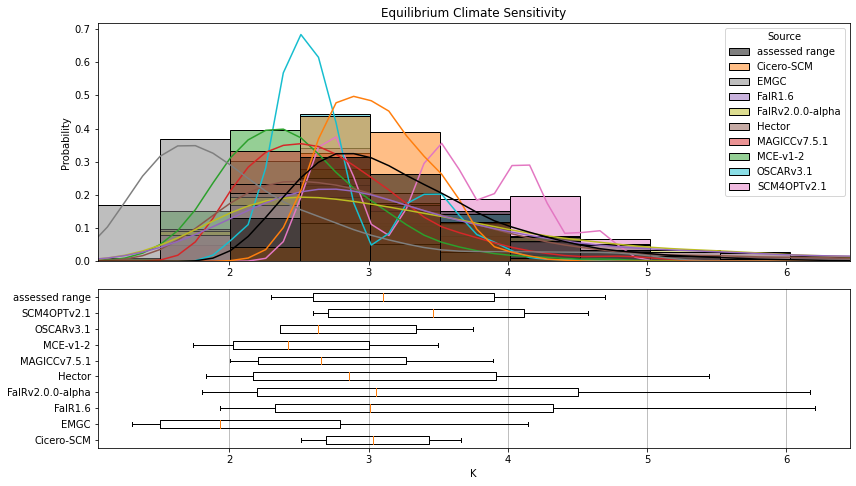

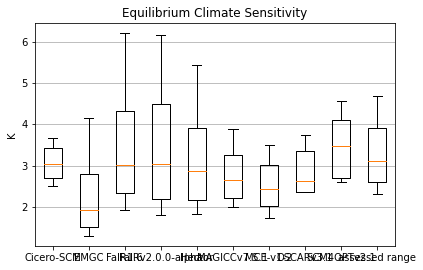

  0%|          | 0/5 [00:00<?, ?it/s]

climate_model assessed_range_label  assessed_range_value  \
0         Cicero-SCM   very_likely__lower                   2.3   
1               EMGC   very_likely__lower                   2.3   
2            FaIR1.6   very_likely__lower                   2.3   
3   FaIRv2.0.0-alpha   very_likely__lower                   2.3   
4             Hector   very_likely__lower                   2.3   
5       MAGICCv7.5.1   very_likely__lower                   2.3   
6           MCE-v1-2   very_likely__lower                   2.3   
7          OSCARv3.1   very_likely__lower                   2.3   
8        SCM4OPTv2.1   very_likely__lower                   2.3   
9         Cicero-SCM        likely__lower                   2.6   
10              EMGC        likely__lower                   2.6   
11           FaIR1.6        likely__lower                   2.6   
12  FaIRv2.0.0-alpha        likely__lower                   2.6   
13            Hector        likely__lower                   2.6   
14      MAGICCv7.5.1        likely__lower                   2.6   
15          MCE-v1-2        likely__lower                   2.6   
16         OSCARv3.1        likely__lower                   2.6   
17       SCM4OPTv2.1        likely__lower                   2.6   
18        Cicero-SCM              central                   3.1   
19              EMGC              central                   3.1   
20           FaIR1.6              central                   3.1   
21  FaIRv2.0.0-alpha              central                   3.1   
22            Hector              central                   3.1   
23      MAGICCv7.5.1              central                   3.1   
24          MCE-v1-2              central                   3.1   
25         OSCARv3.1              central                   3.1   
26       SCM4OPTv2.1              central                   3.1   
27        Cicero-SCM        likely__upper                   3.9   
28              EMGC        likely__upper                   3.9   
29           FaIR1.6        likely__upper                   3.9   
30  FaIRv2.0.0-alpha        likely__upper                   3.9   
31            Hector        likely__upper                   3.9   
32      MAGICCv7.5.1        likely__upper                   3.9   
33          MCE-v1-2        likely__upper                   3.9   
34         OSCARv3.1        likely__upper                   3.9   
35       SCM4OPTv2.1        likely__upper                   3.9   
36        Cicero-SCM   very_likely__upper                   4.7   
37              EMGC   very_likely__upper                   4.7   
38           FaIR1.6   very_likely__upper                   4.7   
39  FaIRv2.0.0-alpha   very_likely__upper                   4.7   
40            Hector   very_likely__upper                   4.7   
41      MAGICCv7.5.1   very_likely__upper                   4.7   
42          MCE-v1-2   very_likely__upper                   4.7   
43         OSCARv3.1   very_likely__upper                   4.7   
44       SCM4OPTv2.1   very_likely__upper                   4.7   

    climate_model_value  percentage_difference  \
0              2.515894               9.386689   
1              1.300000             -43.478261   
2              1.930612             -16.060339   
3              1.804052             -21.562973   
4              1.833743             -20.272061   
5              2.002755             -12.923686   
6              1.738274             -24.422890   
7              2.364406               2.800239   
8              2.597086              12.916778   
9              2.693874               3.610520   
10             1.502000             -42.230769   
11             2.326253             -10.528713   
12             2.200194             -15.377144   
13             2.167862             -16.620706   
14             2.202100             -15.303841   
15             2.022094             -22.227136   
16             2.365715              -9.010968   
17             2.706634 

<IPython.core.display.Javascript object>

In [15]:
summary_table_model_reported = (
    assessed_ranges.plot_model_reported_against_assessed_ranges(model_reported)
)
summary_table_model_reported

In [16]:
custom_calculators = {
    pyrcmip.metric_calculations.CalculatorTCR,
    pyrcmip.metric_calculations.CalculatorTCRE,
}

<IPython.core.display.Javascript object>

In [17]:
variables_of_interest = [
    v
    for v in assessed_ranges.db["RCMIP name"]
    if v
    in [
        #         "Atmospheric Lifetime|CH4 World historical-2005",
        #         "Atmospheric Lifetime|N2O World historical-2005",
        #         "Cumulative Net Land to Atmosphere Flux|CO2 World esm-hist-2011",
        #         "Cumulative Net Ocean to Atmosphere Flux|CO2 World esm-hist-2011",
        "Effective Radiative Forcing|Anthropogenic|Aerosols World historical-1750",
        "Effective Radiative Forcing|Anthropogenic|CH4 World historical-1750",
        "Effective Radiative Forcing|Anthropogenic|CO2 World historical-1750",
        "Effective Radiative Forcing|Anthropogenic|F-Gases World historical-1750",
        "Effective Radiative Forcing|Anthropogenic|Montreal Gases World historical-1750",
        "Effective Radiative Forcing|Anthropogenic|N2O World historical-1750",
        "Heat Content|Ocean World ssp245 1971-2018",
        #         "Increase Atmospheric Concentrations|CO2 World esm-hist-2011",
        #         "Net Land to Atmosphere Flux|CO2 World esm-hist-1980",
        #         "Net Land to Atmosphere Flux|CO2 World esm-hist-1990",
        #         "Net Land to Atmosphere Flux|CO2 World esm-hist-2000",
        #         "Net Land to Atmosphere Flux|CO2 World esm-hist-2002",
        #         "Net Ocean to Atmosphere Flux|CO2 World esm-hist-1980",
        #         "Net Ocean to Atmosphere Flux|CO2 World esm-hist-1990",
        #         "Net Ocean to Atmosphere Flux|CO2 World esm-hist-2000",
        #         "Net Ocean to Atmosphere Flux|CO2 World esm-hist-2002",
        #         "Radiative Forcing|Anthropogenic|Albedo Change World historical-1750",
        #         "Radiative Forcing|Anthropogenic|Other|BC on Snow World historical-1750",
        #         "Radiative Forcing|Anthropogenic|Other|CH4 Oxidation Stratospheric H2O World historical-1750",
        #         "Radiative Forcing|Anthropogenic|Stratospheric Ozone World historical-1750",
        #         "Radiative Forcing|Anthropogenic|Tropospheric Ozone World historical-1750",
        #         "Rate Increase Atmospheric Concentrations|CO2 World esm-hist-1980",
        #         "Rate Increase Atmospheric Concentrations|CO2 World esm-hist-1990",
        #         "Rate Increase Atmospheric Concentrations|CO2 World esm-hist-2000",
        #         "Rate Increase Atmospheric Concentrations|CO2 World esm-hist-2002",
        "Surface Air Ocean Blended Temperature Change World ssp245 2000-2019",
        "Transient Climate Response",
        "Transient Climate Response to Emissions",
    ]
]

assessed_ranges_small = utils.rcmip.get_monkey_patched_assessed_ranges(
    pyrcmip.assessed_ranges.AssessedRanges(
        assessed_ranges.db[
            assessed_ranges.db["RCMIP name"].isin(variables_of_interest).fillna(False)
        ]
    )
)
assessed_ranges_small.db

RCMIP name  \
0   Surface Air Ocean Blended Temperature Change W...   
2                          Transient Climate Response   
3             Transient Climate Response to Emissions   
4   Effective Radiative Forcing|Anthropogenic|CH4 ...   
5   Effective Radiative Forcing|Anthropogenic|N2O ...   
6   Effective Radiative Forcing|Anthropogenic|Mont...   
7   Effective Radiative Forcing|Anthropogenic|F-Ga...   
8   Effective Radiative Forcing|Anthropogenic|CO2 ...   
9   Effective Radiative Forcing|Anthropogenic|Aero...   
32          Heat Content|Ocean World ssp245 1971-2018   

                                       RCMIP variable RCMIP region  \
0        Surface Air Ocean Blended Temperature Change        World   
2                      Surface Air Temperature Change        World   
3   Surface Air Temperature Change,Cumulative Emis...        World   
4       Effective Radiative Forcing|Anthropogenic|CH4        World   
5       Effective Radiative Forcing|Anthropogenic|N2O        World   
6   Effective Radiative Forcing|Anthropogenic|Mont...        World   
7   Effective Radiative Forcing|Anthropogenic|F-Gases        World   
8       Effective Radiative Forcing|Anthropogenic|CO2        World   
9   Effective Radiative Forcing|Anthropogenic|Aero...        World   
32                                 Heat Content|Ocean        World   

   RCMIP scenario  evaluation_period_start  evaluation_period_end  \
0          ssp245                   2000.0                 2019.0   
2         1pctCO2                      NaN                    NaN   
3         1pctCO2                      NaN                    NaN   
4      historical                   2011.0                 2011.0   
5      historical                   2011.0                 2011.0   
6      historical                   2011.0                 2011.0   
7      historical                   2011.0                 2011.0   
8      historical                   2014.0                 2014.0   
9      historical                   2014.0                 2014.0   
32         ssp245                   2018.0                 2018.0   

    norm_period_start  norm_period_end  very_likely__lower  likely__lower  \
0              1961.0           1990.0            0.462509            NaN   
2                 NaN              NaN            0.980000       1.260000   
3                 NaN              NaN            1.030000       1.400000   
4                 NaN              NaN                 NaN       0.472500   
5                 NaN              NaN                 NaN       0.141100   
6                 NaN              NaN                 NaN       0.049500   
7                 NaN              NaN                 NaN       0.027000   
8                 NaN              NaN                 NaN       1.690000   
9                 NaN              NaN                 NaN      -1.370000   
32             1971.0           1971.0                 NaN     303.672171   

       central  likely__upper  very_likely__upper     unit  \
0     0.537200            NaN            0.613695        K   
2     1.640000       2.020000            2.290000        K   
3     1.770000       2.140000            2.510000  K / TtC   
4     0.600000       0.727500                 NaN  W / m^2   
5     0.170000       0.198900                 NaN  W / m^2   
6     0.330000       0.610500                 NaN  W / m^2   
7     0.030000       0.033000                 NaN  W / m^2   
8     1.800000       1.910000                 NaN  W / m^2   
9    -1.010000      -0.630000                 NaN  W / m^2   
32  320.692515     337.712859                 NaN       ZJ   

   RCMIP evaluation method                                             Source  
0                     mean                                    HadCRUT.4.6.0.0  
2                   custom    Tokarska et al., 2020 Table S3 Both constrained  
3                   custom                                 Arora et al., 2020  
4                     mean  AR5 W

<IPython.core.display.Javascript object>

Renormalising histograms:   0%|          | 0/10 [00:00<?, ?it/s]

../../paper/equilibrium-climate-sensitivity-v-assessed-ranges.pdf


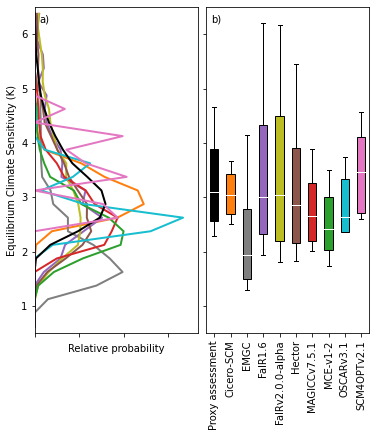

Loading files:   0%|          | 0/9 [00:00<?, ?it/s]

/data/ubuntu-znicholls/miniconda3/envs/rcmip-phase-2/lib/python3.7/site-packages/scmdata/netcdf.py:201: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dims["time"] = _read_time_variable(ds.variables["time"])


Using OSCAR reported data for Surface Air Ocean Blended Temperature Change World ssp245 2000-2019


Renormalising histograms:   0%|          | 0/10 [00:00<?, ?it/s]

../../paper/surface-air-ocean-blended-temperature-change-world-ssp245-2000-2019-v-assessed-ranges.pdf


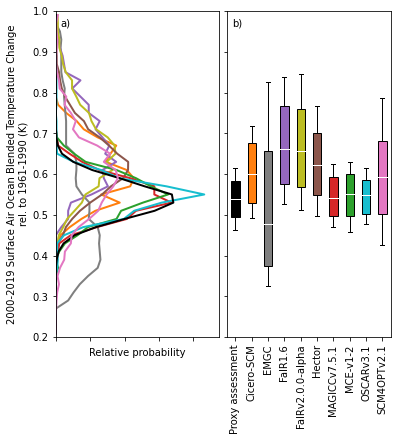

Loading files:   0%|          | 0/8 [00:00<?, ?it/s]

/data/ubuntu-znicholls/miniconda3/envs/rcmip-phase-2/lib/python3.7/site-packages/scmdata/netcdf.py:201: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dims["time"] = _read_time_variable(ds.variables["time"])


Using OSCAR reported data for Transient Climate Response


Renormalising histograms:   0%|          | 0/9 [00:00<?, ?it/s]

../../paper/transient-climate-response-v-assessed-ranges.pdf


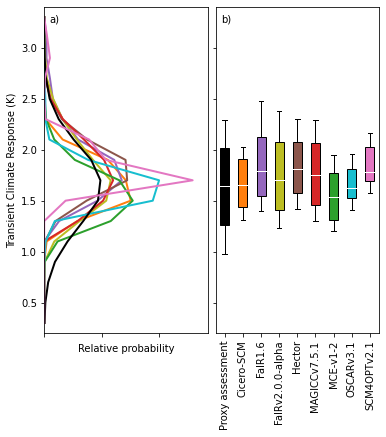

Loading files:   0%|          | 0/8 [00:00<?, ?it/s]

/data/ubuntu-znicholls/miniconda3/envs/rcmip-phase-2/lib/python3.7/site-packages/scmdata/netcdf.py:201: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dims["time"] = _read_time_variable(ds.variables["time"])


Loading files:   0%|          | 0/5 [00:00<?, ?it/s]

Filtered ScmRun is empty!
Stack (most recent call last):
  File "/data/ubuntu-znicholls/miniconda3/envs/rcmip-phase-2/lib/python3.7/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/data/ubuntu-znicholls/miniconda3/envs/rcmip-phase-2/lib/python3.7/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/data/ubuntu-znicholls/miniconda3/envs/rcmip-phase-2/lib/python3.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/data/ubuntu-znicholls/miniconda3/envs/rcmip-phase-2/lib/python3.7/site-packages/traitlets/config/application.py", line 845, in launch_instance
    app.start()
  File "/data/ubuntu-znicholls/miniconda3/envs/rcmip-phase-2/lib/python3.7/site-packages/ipykernel/kernelapp.py", line 612, in start
    self.io_loop.start()
  File "/data/ubuntu-znicholls/miniconda3/envs/rcmip-phase-2/lib/python3.7/site-packages/tornado/platform/asyncio.py", line 199, in start
    self.asyncio_loop.run_forever(

Filtered ScmRun is empty!
Stack (most recent call last):
  File "/data/ubuntu-znicholls/miniconda3/envs/rcmip-phase-2/lib/python3.7/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/data/ubuntu-znicholls/miniconda3/envs/rcmip-phase-2/lib/python3.7/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/data/ubuntu-znicholls/miniconda3/envs/rcmip-phase-2/lib/python3.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/data/ubuntu-znicholls/miniconda3/envs/rcmip-phase-2/lib/python3.7/site-packages/traitlets/config/application.py", line 845, in launch_instance
    app.start()
  File "/data/ubuntu-znicholls/miniconda3/envs/rcmip-phase-2/lib/python3.7/site-packages/ipykernel/kernelapp.py", line 612, in start
    self.io_loop.start()
  File "/data/ubuntu-znicholls/miniconda3/envs/rcmip-phase-2/lib/python3.7/site-packages/tornado/platform/asyncio.py", line 199, in start
    self.asyncio_loop.run_forever(

Using OSCAR reported data for Transient Climate Response to Emissions


Renormalising histograms:   0%|          | 0/6 [00:00<?, ?it/s]

../../paper/transient-climate-response-to-emissions-v-assessed-ranges.pdf


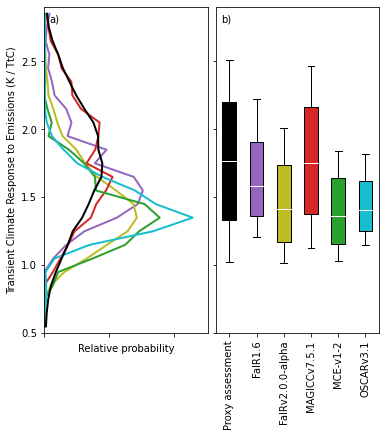

Loading files:   0%|          | 0/8 [00:00<?, ?it/s]

/data/ubuntu-znicholls/miniconda3/envs/rcmip-phase-2/lib/python3.7/site-packages/scmdata/netcdf.py:201: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dims["time"] = _read_time_variable(ds.variables["time"])


Using OSCAR reported data for Effective Radiative Forcing|Anthropogenic|CH4 World historical-1750


Renormalising histograms:   0%|          | 0/9 [00:00<?, ?it/s]

../../paper/effective-radiative-forcing-anthropogenic-ch4-world-historical-1750-v-assessed-ranges.pdf


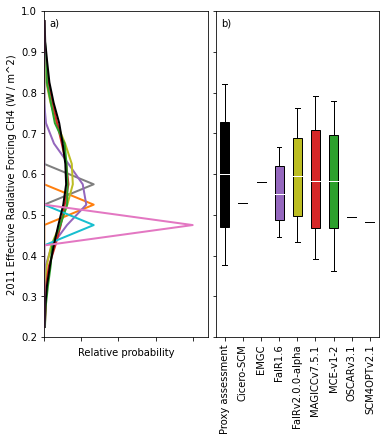

Loading files:   0%|          | 0/8 [00:00<?, ?it/s]

/data/ubuntu-znicholls/miniconda3/envs/rcmip-phase-2/lib/python3.7/site-packages/scmdata/netcdf.py:201: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dims["time"] = _read_time_variable(ds.variables["time"])


Using OSCAR reported data for Effective Radiative Forcing|Anthropogenic|N2O World historical-1750


Renormalising histograms:   0%|          | 0/9 [00:00<?, ?it/s]

../../paper/effective-radiative-forcing-anthropogenic-n2o-world-historical-1750-v-assessed-ranges.pdf


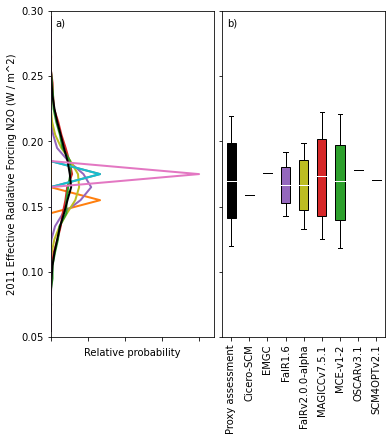

Loading files:   0%|          | 0/6 [00:00<?, ?it/s]

Using OSCAR reported data for Effective Radiative Forcing|Anthropogenic|F-Gases World historical-1750


Renormalising histograms:   0%|          | 0/7 [00:00<?, ?it/s]

../../paper/effective-radiative-forcing-anthropogenic-f-gases-world-historical-1750-v-assessed-ranges.pdf


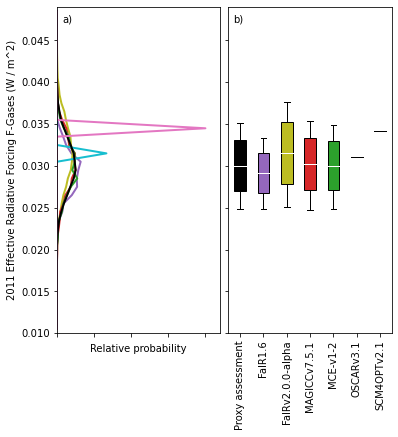

Loading files:   0%|          | 0/8 [00:00<?, ?it/s]

/data/ubuntu-znicholls/miniconda3/envs/rcmip-phase-2/lib/python3.7/site-packages/scmdata/netcdf.py:201: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dims["time"] = _read_time_variable(ds.variables["time"])


Using OSCAR reported data for Effective Radiative Forcing|Anthropogenic|CO2 World historical-1750


Renormalising histograms:   0%|          | 0/9 [00:00<?, ?it/s]

../../paper/effective-radiative-forcing-anthropogenic-co2-world-historical-1750-v-assessed-ranges.pdf


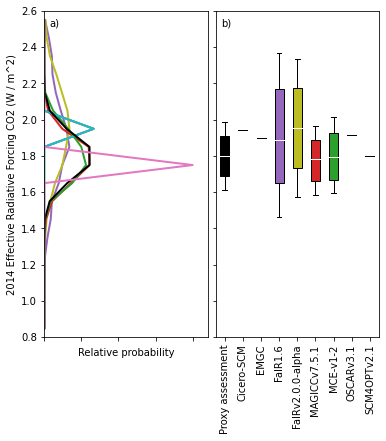

Loading files:   0%|          | 0/9 [00:00<?, ?it/s]

/data/ubuntu-znicholls/miniconda3/envs/rcmip-phase-2/lib/python3.7/site-packages/scmdata/netcdf.py:201: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dims["time"] = _read_time_variable(ds.variables["time"])


Using OSCAR reported data for Effective Radiative Forcing|Anthropogenic|Aerosols World historical-1750


Renormalising histograms:   0%|          | 0/10 [00:00<?, ?it/s]

../../paper/effective-radiative-forcing-anthropogenic-aerosols-world-historical-1750-v-assessed-ranges.pdf


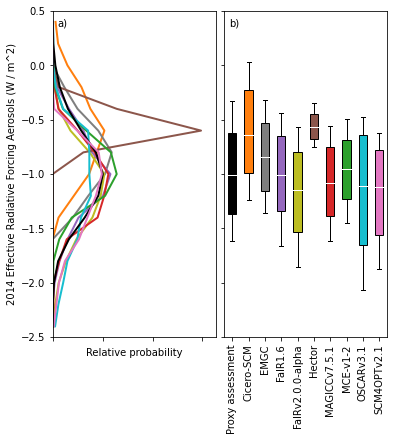

Loading files:   0%|          | 0/7 [00:00<?, ?it/s]

/data/ubuntu-znicholls/miniconda3/envs/rcmip-phase-2/lib/python3.7/site-packages/scmdata/netcdf.py:201: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dims["time"] = _read_time_variable(ds.variables["time"])


Using OSCAR reported data for Heat Content|Ocean World ssp245 1971-2018


Renormalising histograms:   0%|          | 0/8 [00:00<?, ?it/s]

../../paper/heat-content-ocean-world-ssp245-1971-2018-v-assessed-ranges.pdf


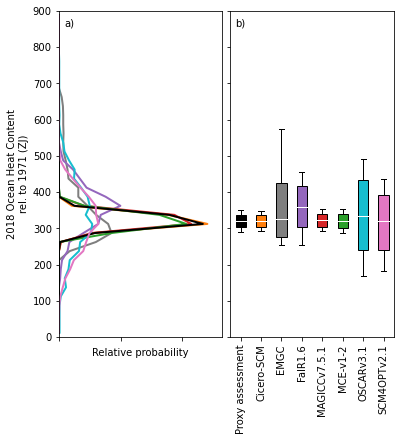

<IPython.core.display.Javascript object>

In [18]:
include_assessed_pdf = True
palette = utils.plotting.CLIMATE_MODEL_PALETTE

for (metric, bins, custom_heights) in (
    (
        "Equilibrium Climate Sensitivity",
        np.arange(0.5, 6.6, 0.25),
        {},
    ),
    (
        "Surface Air Ocean Blended Temperature Change World ssp245 2000-2019",
        np.arange(0.2, 1.01, 0.02),
        {},
    ),
    ("Transient Climate Response", np.arange(0.2, 3.5, 0.2), {}),
    ("Transient Climate Response to Emissions", np.arange(0.5, 3.0, 0.1), {}),
    (
        "Effective Radiative Forcing|Anthropogenic|CH4 World historical-1750",
        np.arange(0.2, 1.01, 0.05),
        {"Cicero-SCM": 1 / 3, "EMGC": 1 / 3, "OSCARv3.1": 1 / 3},
    ),
    (
        "Effective Radiative Forcing|Anthropogenic|N2O World historical-1750",
        np.arange(0.05, 0.31, 0.01),
        {"Cicero-SCM": 1 / 3, "EMGC": 1 / 3, "OSCARv3.1": 1 / 3},
    ),
    (
        "Effective Radiative Forcing|Anthropogenic|F-Gases World historical-1750",
        np.arange(0.01, 0.05, 0.001),
        {"SCM4OPTv2.0": 1 / 2, "OSCARv3.1": 1 / 3},
    ),
    (
        "Effective Radiative Forcing|Anthropogenic|CO2 World historical-1750",
        np.arange(0.8, 2.61, 0.1),
        {"Cicero-SCM": 1 / 3, "EMGC": 1 / 3, "OSCARv3.1": 1 / 3},
    ),
    (
        "Effective Radiative Forcing|Anthropogenic|Aerosols World historical-1750",
        np.arange(-2.5, 0.51, 0.2),
        {"hector": 1 / 2},
    ),
    (
        "Heat Content|Ocean World ssp245 1971-2018",
        np.arange(0, 901, 25),
        {},
    ),
):
    if "Transient" in metric:
        ylabel_var = metric
    elif "Equilibrium" in metric:
        ylabel_var = metric
    else:
        ylabel_var = assessed_ranges.get_col_for_metric(metric, "RCMIP variable")

    if "Equilibrium" in metric:
        model_results = model_reported[model_reported["RCMIP name"] == metric]
    else:
        try:
            var_region_scen = (
                assessed_ranges_small.get_variables_regions_scenarios_for_metric(metric)
            )
        except ValueError:
            print(f"Skipping {metric}")
            continue

        calc_df = scmdata.run_append(
            [
                db.load_data(climate_model="*", variable=v, region=r, scenario=s)
                for v in var_region_scen["variable"]
                for r in var_region_scen["region"]
                for s in var_region_scen["scenario"]
            ]
        ).time_mean("AC")

        model_results = assessed_ranges.calculate_metric_from_results(
            metric, calc_df, custom_calculators=custom_calculators
        )
    box_plot_df = utils.plotting.get_box_plot_df(
        assessed_ranges, metric, model_results, include_assessed_pdf
    )
    box_plot_stats = assessed_ranges._get_box_whisker_stats_custom_quantiles(
        box_plot_df, metric, box_quantiles=(17, 83), whisker_quantiles=(5, 95)
    )

    fig, (ax_pdf, ax_box) = plt.subplots(ncols=2, nrows=1, figsize=(6, 6), sharey=True)
    fig.subplots_adjust(wspace=0.05)

    ax_pdf = utils.plotting.make_pdf_plot(
        ax_pdf,
        box_plot_df,
        metric,
        palette,
        bins=bins,
        hue="Source",
        legend=False,
        linewidth=2,
        custom_heights=custom_heights,
    )

    ax_box = utils.plotting.make_box_plot(
        ax_box,
        box_plot_stats,
        palette,
    )

    (
        metric_ref_period,
        metric_evaluation_period,
    ) = assessed_ranges.get_norm_period_evaluation_period(metric)

    pdf_ylabel = utils.plotting.get_ylabel(
        ylabel_var,
        assessed_ranges.get_col_for_metric(metric, "unit"),
        metric_ref_period,
        metric_evaluation_period,
    )
    ax_pdf.set_ylabel(
        pdf_ylabel.replace(
            "Effective Radiative Forcing|Anthropogenic|", "Effective Radiative Forcing "
        ).replace("Heat Content|Ocean", "Ocean Heat Content")
    )
    ax_pdf.set_ylim(bins[0], bins[-1])

    utils.plotting.add_panel_label(ax_pdf, 0)
    utils.plotting.add_panel_label(ax_box, 1)
    outfile = os.path.join(
        PAPER_DIR,
        "{}-v-assessed-ranges.pdf".format(
            metric.lower().replace(" ", "-").replace("|", "-")
        ),
    )
    print(outfile)
    plt.savefig(outfile, **utils.plotting.SAVE_KWARGS)
    plt.show()
#     break

  0%|          | 0/10 [00:00<?, ?it/s]

Loading files:   0%|          | 0/9 [00:00<?, ?it/s]

/data/ubuntu-znicholls/miniconda3/envs/rcmip-phase-2/lib/python3.7/site-packages/scmdata/netcdf.py:201: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dims["time"] = _read_time_variable(ds.variables["time"])


Using OSCAR reported data for Surface Air Ocean Blended Temperature Change World ssp245 2000-2019


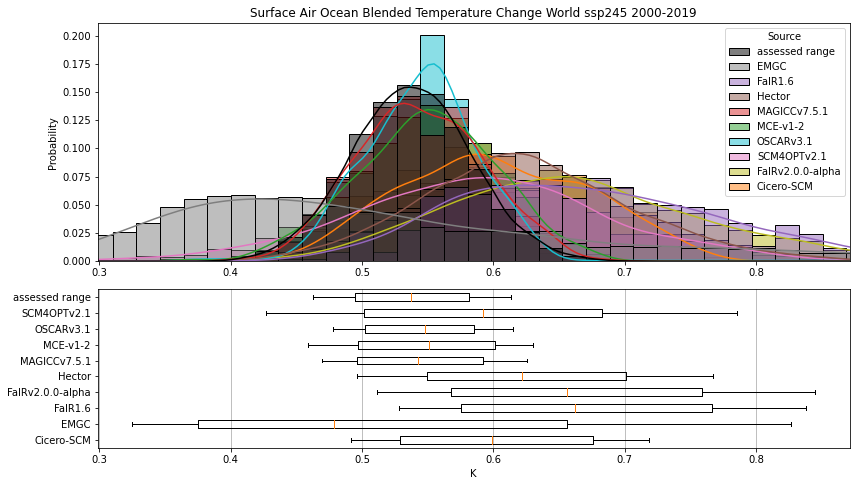

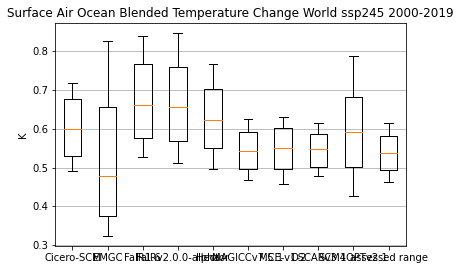

  0%|          | 0/5 [00:00<?, ?it/s]

Loading files:   0%|          | 0/8 [00:00<?, ?it/s]

/data/ubuntu-znicholls/miniconda3/envs/rcmip-phase-2/lib/python3.7/site-packages/scmdata/netcdf.py:201: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dims["time"] = _read_time_variable(ds.variables["time"])


Using OSCAR reported data for Transient Climate Response


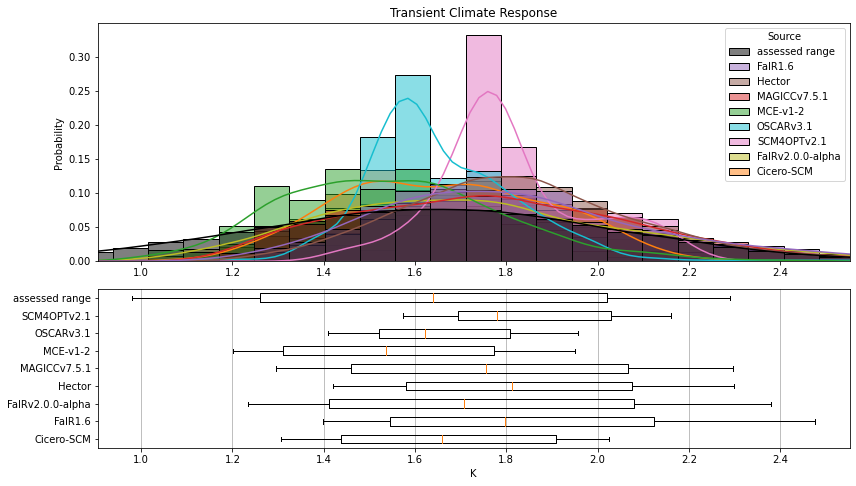

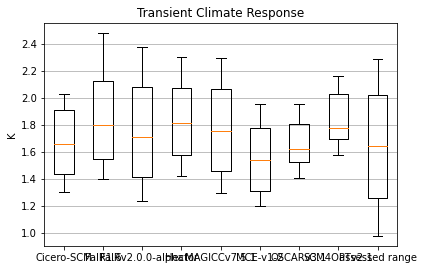

  0%|          | 0/5 [00:00<?, ?it/s]

Loading files:   0%|          | 0/8 [00:00<?, ?it/s]

/data/ubuntu-znicholls/miniconda3/envs/rcmip-phase-2/lib/python3.7/site-packages/scmdata/netcdf.py:201: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dims["time"] = _read_time_variable(ds.variables["time"])


Loading files:   0%|          | 0/5 [00:00<?, ?it/s]

Filtered ScmRun is empty!
Stack (most recent call last):
  File "/data/ubuntu-znicholls/miniconda3/envs/rcmip-phase-2/lib/python3.7/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/data/ubuntu-znicholls/miniconda3/envs/rcmip-phase-2/lib/python3.7/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/data/ubuntu-znicholls/miniconda3/envs/rcmip-phase-2/lib/python3.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/data/ubuntu-znicholls/miniconda3/envs/rcmip-phase-2/lib/python3.7/site-packages/traitlets/config/application.py", line 845, in launch_instance
    app.start()
  File "/data/ubuntu-znicholls/miniconda3/envs/rcmip-phase-2/lib/python3.7/site-packages/ipykernel/kernelapp.py", line 612, in start
    self.io_loop.start()
  File "/data/ubuntu-znicholls/miniconda3/envs/rcmip-phase-2/lib/python3.7/site-packages/tornado/platform/asyncio.py", line 199, in start
    self.asyncio_loop.run_forever(

Filtered ScmRun is empty!
Stack (most recent call last):
  File "/data/ubuntu-znicholls/miniconda3/envs/rcmip-phase-2/lib/python3.7/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/data/ubuntu-znicholls/miniconda3/envs/rcmip-phase-2/lib/python3.7/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/data/ubuntu-znicholls/miniconda3/envs/rcmip-phase-2/lib/python3.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/data/ubuntu-znicholls/miniconda3/envs/rcmip-phase-2/lib/python3.7/site-packages/traitlets/config/application.py", line 845, in launch_instance
    app.start()
  File "/data/ubuntu-znicholls/miniconda3/envs/rcmip-phase-2/lib/python3.7/site-packages/ipykernel/kernelapp.py", line 612, in start
    self.io_loop.start()
  File "/data/ubuntu-znicholls/miniconda3/envs/rcmip-phase-2/lib/python3.7/site-packages/tornado/platform/asyncio.py", line 199, in start
    self.asyncio_loop.run_forever(

Using OSCAR reported data for Transient Climate Response to Emissions


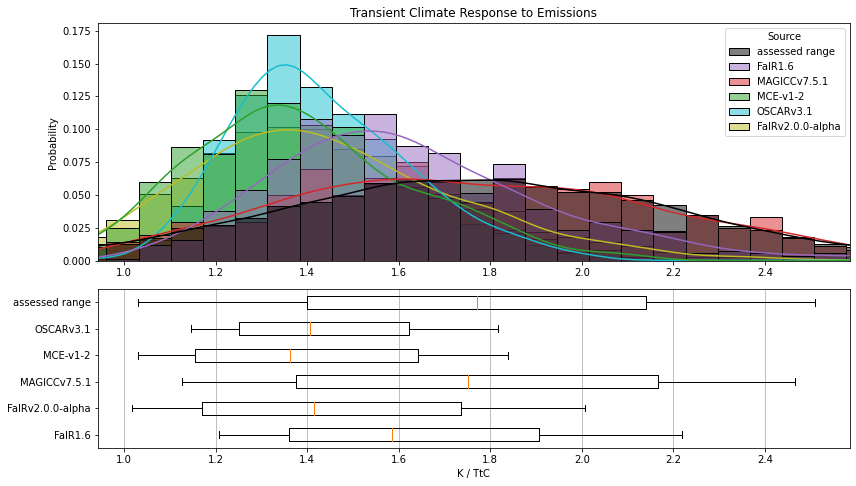

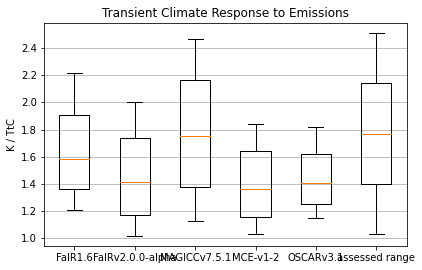

  0%|          | 0/5 [00:00<?, ?it/s]

Loading files:   0%|          | 0/8 [00:00<?, ?it/s]

/data/ubuntu-znicholls/miniconda3/envs/rcmip-phase-2/lib/python3.7/site-packages/scmdata/netcdf.py:201: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dims["time"] = _read_time_variable(ds.variables["time"])


Using OSCAR reported data for Effective Radiative Forcing|Anthropogenic|CH4 World historical-1750


/data/ubuntu-znicholls/miniconda3/envs/rcmip-phase-2/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/data/ubuntu-znicholls/miniconda3/envs/rcmip-phase-2/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


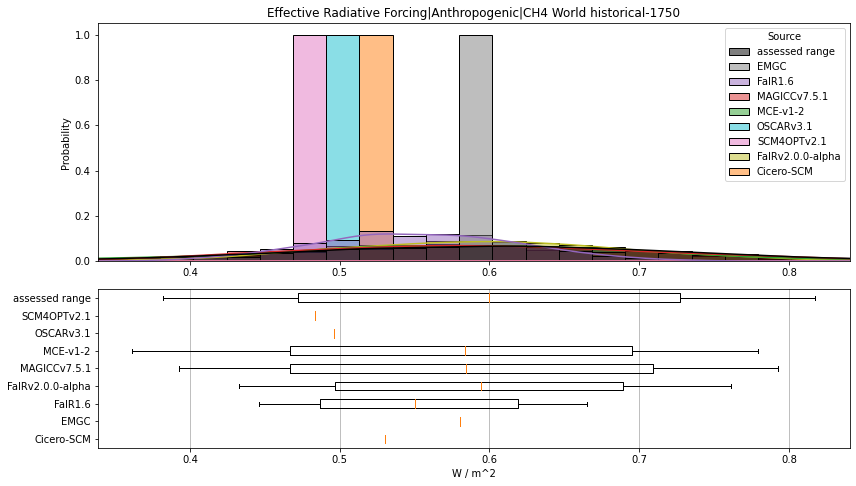

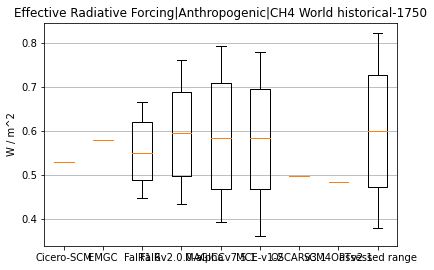

  0%|          | 0/5 [00:00<?, ?it/s]

Loading files:   0%|          | 0/8 [00:00<?, ?it/s]

/data/ubuntu-znicholls/miniconda3/envs/rcmip-phase-2/lib/python3.7/site-packages/scmdata/netcdf.py:201: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dims["time"] = _read_time_variable(ds.variables["time"])


Using OSCAR reported data for Effective Radiative Forcing|Anthropogenic|N2O World historical-1750


/data/ubuntu-znicholls/miniconda3/envs/rcmip-phase-2/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


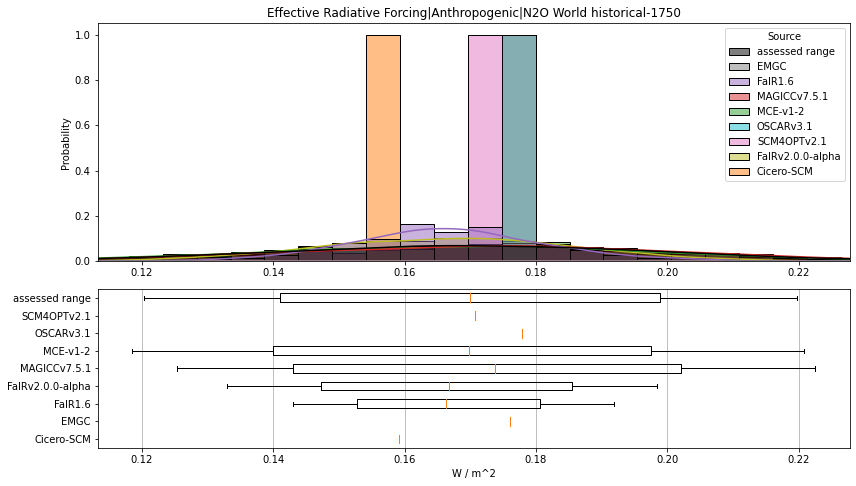

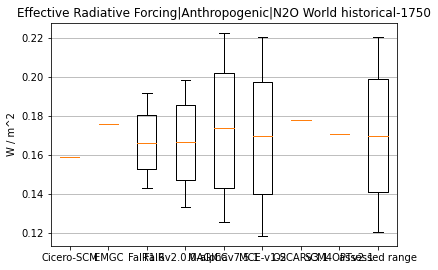

  0%|          | 0/5 [00:00<?, ?it/s]

Loading files:   0%|          | 0/5 [00:00<?, ?it/s]

Using OSCAR reported data for Effective Radiative Forcing|Anthropogenic|Montreal Gases World historical-1750


/data/ubuntu-znicholls/miniconda3/envs/rcmip-phase-2/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


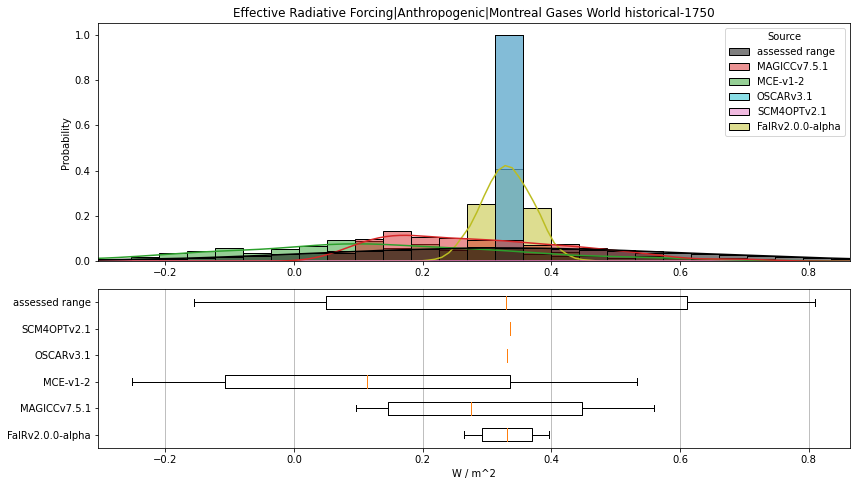

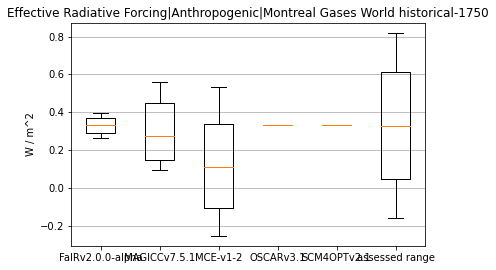

  0%|          | 0/5 [00:00<?, ?it/s]

Loading files:   0%|          | 0/6 [00:00<?, ?it/s]

Using OSCAR reported data for Effective Radiative Forcing|Anthropogenic|F-Gases World historical-1750


/data/ubuntu-znicholls/miniconda3/envs/rcmip-phase-2/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/data/ubuntu-znicholls/miniconda3/envs/rcmip-phase-2/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


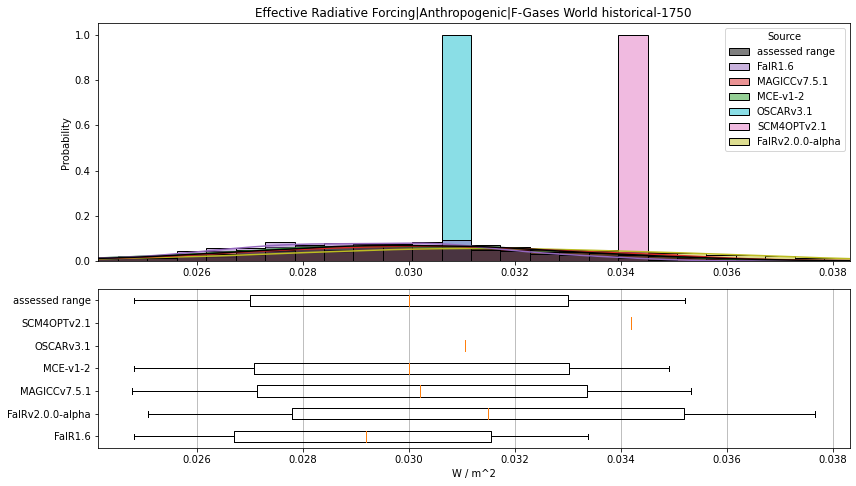

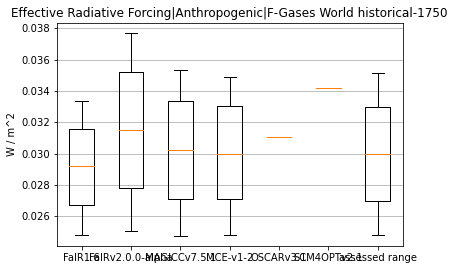

  0%|          | 0/5 [00:00<?, ?it/s]

Loading files:   0%|          | 0/8 [00:00<?, ?it/s]

/data/ubuntu-znicholls/miniconda3/envs/rcmip-phase-2/lib/python3.7/site-packages/scmdata/netcdf.py:201: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dims["time"] = _read_time_variable(ds.variables["time"])


Using OSCAR reported data for Effective Radiative Forcing|Anthropogenic|CO2 World historical-1750


/data/ubuntu-znicholls/miniconda3/envs/rcmip-phase-2/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/data/ubuntu-znicholls/miniconda3/envs/rcmip-phase-2/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


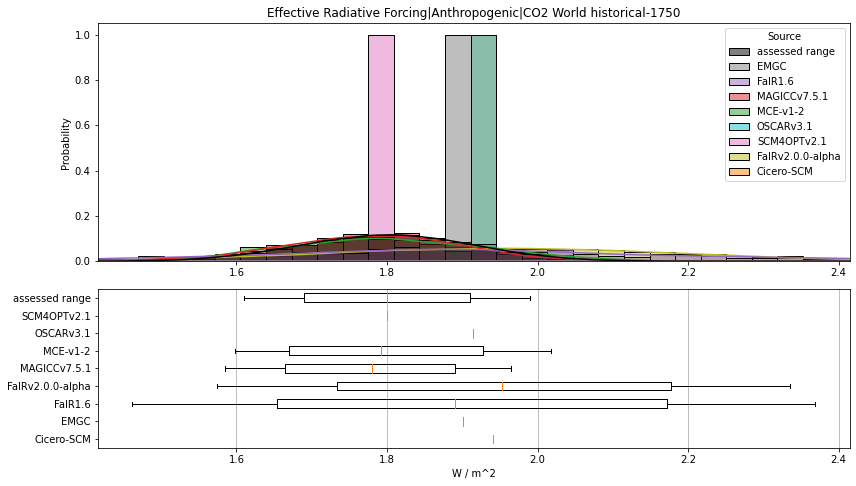

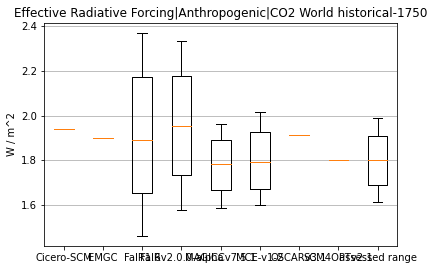

  0%|          | 0/5 [00:00<?, ?it/s]

Loading files:   0%|          | 0/9 [00:00<?, ?it/s]

/data/ubuntu-znicholls/miniconda3/envs/rcmip-phase-2/lib/python3.7/site-packages/scmdata/netcdf.py:201: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dims["time"] = _read_time_variable(ds.variables["time"])


Using OSCAR reported data for Effective Radiative Forcing|Anthropogenic|Aerosols World historical-1750


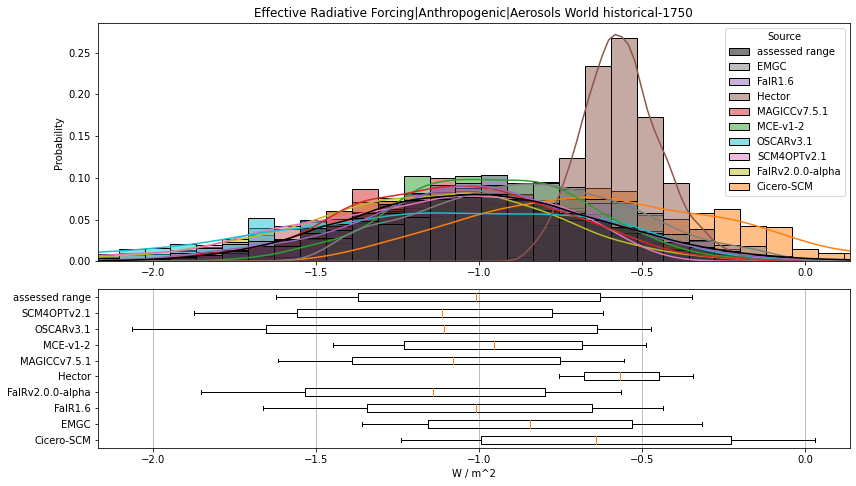

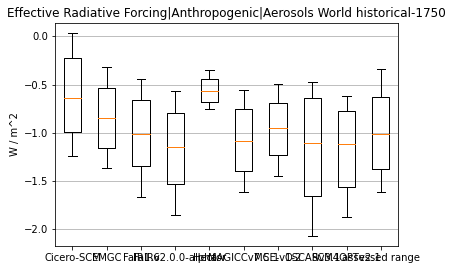

  0%|          | 0/5 [00:00<?, ?it/s]

Loading files:   0%|          | 0/7 [00:00<?, ?it/s]

/data/ubuntu-znicholls/miniconda3/envs/rcmip-phase-2/lib/python3.7/site-packages/scmdata/netcdf.py:201: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dims["time"] = _read_time_variable(ds.variables["time"])


Using OSCAR reported data for Heat Content|Ocean World ssp245 1971-2018


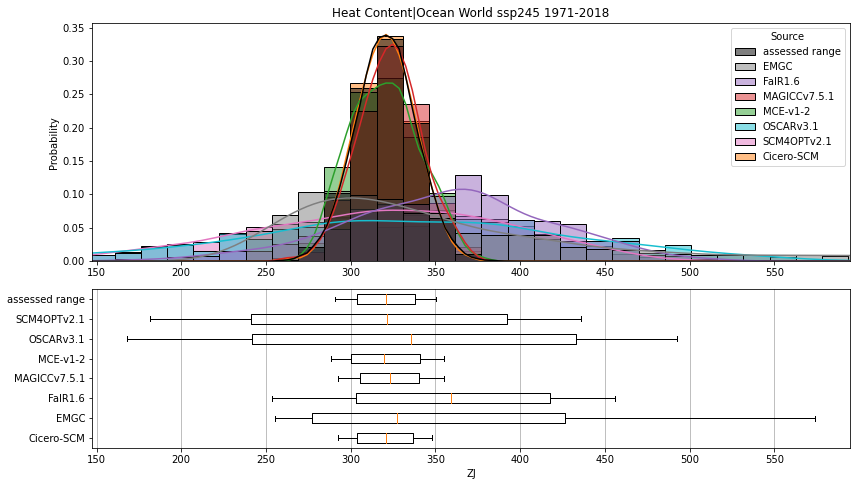

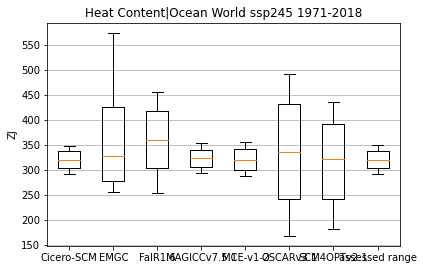

  0%|          | 0/5 [00:00<?, ?it/s]

climate_model assessed_range_label  assessed_range_value  \
0          Cicero-SCM   very_likely__lower              0.462509   
1                EMGC   very_likely__lower              0.462509   
2             FaIR1.6   very_likely__lower              0.462509   
3    FaIRv2.0.0-alpha   very_likely__lower              0.462509   
4              Hector   very_likely__lower              0.462509   
..                ...                  ...                   ...   
240           FaIR1.6        likely__upper            337.712859   
241      MAGICCv7.5.1        likely__upper            337.712859   
242          MCE-v1-2        likely__upper            337.712859   
243         OSCARv3.1        likely__upper            337.712859   
244       SCM4OPTv2.1        likely__upper            337.712859   

     climate_model_value  percentage_difference  \
0               0.491775               6.327673   
1               0.324750             -29.785127   
2               0.527766              14.109398   
3               0.511102              10.506376   
4               0.496355               7.317864   
..                   ...                    ...   
240           417.442653              23.608753   
241           340.210943               0.739706   
242           340.964134               0.962733   
243           432.970247              28.206621   
244           392.028543              16.083392   

                                            RCMIP name unit  
0    Surface Air Ocean Blended Temperature Change W...    K  
1    Surface Air Ocean Blended Temperature Change W...    K  
2    Surface Air Ocean Blended Temperature Change W...    K  
3    Surface Air Ocean Blended Temperature Change W...    K  
4    Surface Air Ocean Blended Temperature Change W...    K  
..                                                 ...  ...  
240          Heat Content|Ocean World ssp245 1971-2018   ZJ  
241          Heat Content|Ocean World ssp245 1971-2018   ZJ  
242          Heat Content|Ocean World ssp245 1971-2018   ZJ  
243          Heat Content|Ocean World ssp245 1971-2018   ZJ  
244          Heat Content|Ocean World ssp245 1971-2018   ZJ  

[245 rows x 7 columns]

<IPython.core.display.Javascript object>

In [19]:
summary_table_derived_calcs = assessed_ranges_small.plot_against_results(
    db, custom_calculators=custom_calculators
)
summary_table_derived_calcs

In [20]:
summary_table = pd.concat([summary_table_model_reported, summary_table_derived_calcs])
summary_table

climate_model assessed_range_label  assessed_range_value  \
0          Cicero-SCM   very_likely__lower              2.300000   
1                EMGC   very_likely__lower              2.300000   
2             FaIR1.6   very_likely__lower              2.300000   
3    FaIRv2.0.0-alpha   very_likely__lower              2.300000   
4              Hector   very_likely__lower              2.300000   
..                ...                  ...                   ...   
240           FaIR1.6        likely__upper            337.712859   
241      MAGICCv7.5.1        likely__upper            337.712859   
242          MCE-v1-2        likely__upper            337.712859   
243         OSCARv3.1        likely__upper            337.712859   
244       SCM4OPTv2.1        likely__upper            337.712859   

     climate_model_value  percentage_difference  \
0               2.515894               9.386689   
1               1.300000             -43.478261   
2               1.930612             -16.060339   
3               1.804052             -21.562973   
4               1.833743             -20.272061   
..                   ...                    ...   
240           417.442653              23.608753   
241           340.210943               0.739706   
242           340.964134               0.962733   
243           432.970247              28.206621   
244           392.028543              16.083392   

                                    RCMIP name unit  
0              Equilibrium Climate Sensitivity    K  
1              Equilibrium Climate Sensitivity    K  
2              Equilibrium Climate Sensitivity    K  
3              Equilibrium Climate Sensitivity    K  
4              Equilibrium Climate Sensitivity    K  
..                                         ...  ...  
240  Heat Content|Ocean World ssp245 1971-2018   ZJ  
241  Heat Content|Ocean World ssp245 1971-2018   ZJ  
242  Heat Content|Ocean World ssp245 1971-2018   ZJ  
243  Heat Content|Ocean World ssp245 1971-2018   ZJ  
244  Heat Content|Ocean World ssp245 1971-2018   ZJ  

[290 rows x 7 columns]

<IPython.core.display.Javascript object>

In [21]:
db.save_summary_table(summary_table, "all_results")

<IPython.core.display.Javascript object>